# <데이터 분석 과제>
- 한국인의 삶
    1. 복지데이터 : Koweps_h17_2022_beta1.dta
    2. 코딩북 : (2022년 17차 한국복지패널조사) 조사설계서-가구용(beta1).xlsx
    3. 데이터파일 읽기
    4. 분석에 필요한 항목명 이름 바꾸기
    5. 데이터 분석에 필요한 변수 검토 및 전처리<br>
        5-1. 이상치 확인 및 처리<br>
        5-2. 변구간 관계 분석
    6. 분석 결과 시각화
    
<br>

- 분석 주제( 1번 가구원 데이터 만 가지고 )
    1. 성별에 따른 월급의 차이
    2. 나이대에 따른 월급의 차이
    3. 연령대별 성별에 따른 월급 차이
    4. 교육 수준에 따른 월급의 차이
    5. 직업별 월급의 차이
    6. 성별 직업 분포는
    7. 종교유무에 따른 이혼율은
    8. 노년층이 많은 지역은
    9. 교육수준과 건강과 관계가 있는가?
    10. 월급과 건강과 관계가 있는가?
    11. 종교와 건강과 관계가 있는가?
    12. 주요 경제활동 참여상태의 비율은?
    13. 직업별 총생활비 지출의 평균은?


### ※ 230926_53부터 한국복지패널 데이터 활용 내용있으니 참고 

In [166]:
# 그래프 그릴때 필요한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 글자 출력 오류 해결 
import matplotlib
import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family = font_name)

## - dta 파일 읽어오기

In [167]:
import pandas as pd
import numpy as np

data = pd.read_stata('data/Koweps_h17_2022_beta1.dta')

print(data)

       h17_id  h17_ind  h17_sn   h17_merkey  h_new  h_new1  h17_cobf  \
0         2.0      1.0     1.0      20101.0    0.0     0.0       NaN   
1         3.0      1.0     1.0      30101.0    0.0     0.0       NaN   
2         4.0      1.0     1.0      40101.0    0.0     0.0       NaN   
3         6.0      1.0     1.0      60101.0    0.0     0.0       NaN   
4         8.0      1.0     1.0      80101.0    0.0     0.0       NaN   
...       ...      ...     ...          ...    ...     ...       ...   
7860  12007.0     17.0     1.0  120071701.0    2.0     1.0       NaN   
7861  12008.0     17.0     1.0  120081701.0    2.0     1.0       NaN   
7862  12009.0     17.0     1.0  120091701.0    2.0     1.0       NaN   
7863  12010.0     17.0     1.0  120101701.0    2.0     1.0       NaN   
7864  12011.0     17.0     1.0  120111701.0    2.0     1.0       NaN   

        h17_ws       h17_wg  h17_ws_all  ...  h1716_60  h1716_64  h1716_15aq1  \
0     0.414313  1872.512363    0.450460  ...       NaN

## - 분석에 필요한 데이터 정리

h1701_4(성별)<br>
h1701_5(태어난 년 도)<br>
교육수준(h1701_6(학력(초,중,고,대 등)), h1701_7(재학, 휴학 등))<br>
h17_cin(가처분소득)<br> <!-- 12개월 나눠서 월급으로 출력 -->
h1703_8(직종)<br> <!-- 직종코드 파일참고 -->
h1701_12(종교)<br> <!-- 종교 여부 -->
h1701_11(혼인상태)<br> <!-- 이혼은 3번 -->
h1702_2(건강상태)<br> <!-- 1~5까지 1부터는 매우건강 5부터는 매우안좋음 -->
h17_reg7(지역)<br>
h1703_7aq1(경제활동 참여상태)

In [387]:
columns = ['h1701_4', 'h1701_5', 'h1701_6', 'h1701_7', 'h17_cin', 
           'h1703_8', 'h1701_12', 'h1701_11', 'h1702_2', 'h17_reg7', 
           'h1703_7aq1', 'h1707_9']
korea = data[columns]

korea = korea.rename(columns = {'h1701_4' : '성별', 
                                'h1701_5' : '태어난 년 도', 
                                'h1701_6' : '학력', 
                                'h1701_7' : '학력 상태', 
                                'h17_cin' : '가처분소득', 
                                'h1703_8' : '직종', 
                                'h1701_12' : '종교', 
                                'h1701_11' : '혼인상태', 
                                'h1702_2' : '건강상태',
                                'h17_reg7' : '지역',
                                'h1703_7aq1' : '경제활동 참여상태',
                                'h1707_9' : '총생활비'})
korea


,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,지역,경제활동 참여상태,총생활비
0,2.0,1945.0,4.0,5.0,885.0,NaN,1.0,2.0,4.0,1.0,NaN,275.0
1,1.0,1948.0,3.0,5.0,2884.0,942.0,2.0,2.0,5.0,1.0,NaN,239.0
2,1.0,1942.0,7.0,3.0,2544.0,762.0,1.0,3.0,2.0,1.0,3.0,156.0
3,1.0,1962.0,6.0,5.0,5783.0,855.0,1.0,1.0,2.0,1.0,NaN,541.0
4,2.0,1940.0,3.0,3.0,1192.0,941.0,1.0,2.0,4.0,2.0,9.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7860,1.0,1981.0,6.0,5.0,5503.0,942.0,1.0,1.0,1.0,5.0,NaN,384.0
7861,1.0,1977.0,7.0,5.0,10790.0,311.0,1.0,1.0,2.0,5.0,NaN,715.0
7862,1.0,1976.0,7.0,5.0,10504.0,151.0,2.0,1.0,2.0,5.0,NaN,595.0
7863,1.0,1975.0,7.0,5.0,10420.0,222.0,2.0,1.0,2.0,2.0,NaN,562.0


In [388]:
korea.dtypes

성별           float64
태어난 년 도      float64
학력           float64
학력 상태        float64
가처분소득        float64
직종           float64
종교           float64
혼인상태         float64
건강상태         float64
지역           float64
경제활동 참여상태    float64
총생활비         float64
dtype: object

In [389]:
# 성별 값을 한글화 
gender = {
    1.0 : '남자',
    2.0 : '여자'
}

korea['성별'] =  korea['성별'].replace(gender)
korea

,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,지역,경제활동 참여상태,총생활비
0,여자,1945.0,4.0,5.0,885.0,NaN,1.0,2.0,4.0,1.0,NaN,275.0
1,남자,1948.0,3.0,5.0,2884.0,942.0,2.0,2.0,5.0,1.0,NaN,239.0
2,남자,1942.0,7.0,3.0,2544.0,762.0,1.0,3.0,2.0,1.0,3.0,156.0
3,남자,1962.0,6.0,5.0,5783.0,855.0,1.0,1.0,2.0,1.0,NaN,541.0
4,여자,1940.0,3.0,3.0,1192.0,941.0,1.0,2.0,4.0,2.0,9.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7860,남자,1981.0,6.0,5.0,5503.0,942.0,1.0,1.0,1.0,5.0,NaN,384.0
7861,남자,1977.0,7.0,5.0,10790.0,311.0,1.0,1.0,2.0,5.0,NaN,715.0
7862,남자,1976.0,7.0,5.0,10504.0,151.0,2.0,1.0,2.0,5.0,NaN,595.0
7863,남자,1975.0,7.0,5.0,10420.0,222.0,2.0,1.0,2.0,2.0,NaN,562.0


In [390]:
# 날짜 데이터 타입으로 변경
import datetime

korea['태어난 년 도'] = pd.to_datetime(korea['태어난 년 도'], format='%Y')
korea['태어난 년 도'] = korea['태어난 년 도'].dt.year
korea['태어난 년 도']

0       1945
1       1948
2       1942
3       1962
4       1940
        ... 
7860    1981
7861    1977
7862    1976
7863    1975
7864    1964
Name: 태어난 년 도, Length: 7865, dtype: int64

In [391]:
# 월급 컬럼 생성
korea['월급'] = korea['가처분소득']/12
korea['월급'] 

0        73.750000
1       240.333333
2       212.000000
3       481.916667
4        99.333333
           ...    
7860    458.583333
7861    899.166667
7862    875.333333
7863    868.333333
7864    684.166667
Name: 월급, Length: 7865, dtype: float64

In [392]:
korea

,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,지역,경제활동 참여상태,총생활비,월급
0,여자,1945,4.0,5.0,885.0,NaN,1.0,2.0,4.0,1.0,NaN,275.0,73.750000
1,남자,1948,3.0,5.0,2884.0,942.0,2.0,2.0,5.0,1.0,NaN,239.0,240.333333
2,남자,1942,7.0,3.0,2544.0,762.0,1.0,3.0,2.0,1.0,3.0,156.0,212.000000
3,남자,1962,6.0,5.0,5783.0,855.0,1.0,1.0,2.0,1.0,NaN,541.0,481.916667
4,여자,1940,3.0,3.0,1192.0,941.0,1.0,2.0,4.0,2.0,9.0,85.0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,남자,1981,6.0,5.0,5503.0,942.0,1.0,1.0,1.0,5.0,NaN,384.0,458.583333
7861,남자,1977,7.0,5.0,10790.0,311.0,1.0,1.0,2.0,5.0,NaN,715.0,899.166667
7862,남자,1976,7.0,5.0,10504.0,151.0,2.0,1.0,2.0,5.0,NaN,595.0,875.333333
7863,남자,1975,7.0,5.0,10420.0,222.0,2.0,1.0,2.0,2.0,NaN,562.0,868.333333


## 1. 성별에 따른 월급의 차이

In [393]:
# 남성의 평균 월급
korea_man = korea[korea['성별'] == '남자']
korea_man['월급'].mean()

480.55400858397223

In [394]:
# 여성의 평균 월급
korea_female = korea[korea['성별'] == '여자']
korea_female['월급'].mean()

190.07606791456683

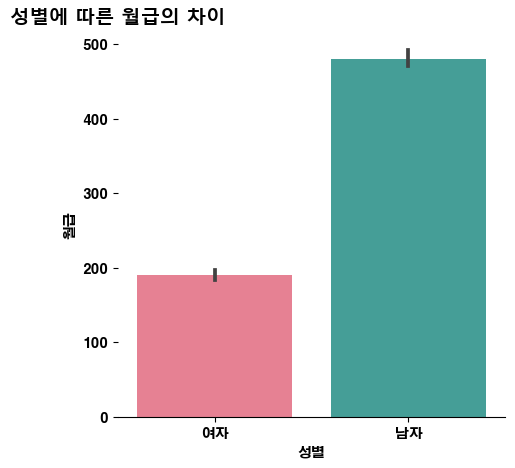

In [395]:
plt.figure(figsize=(5, 5))
sns.barplot(x='성별', y='월급', data=korea, palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('성별에 따른 월급의 차이', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


## 2. 나이대에 따른 월급의 차이

In [396]:
# korea['태어난 년 도']
korea['태어난 년 도'].unique()

array([1945, 1948, 1942, 1962, 1940, 1970, 1978, 1941, 1964, 1975, 1961,
       1952, 1984, 1971, 1943, 1972, 1954, 1936, 1968, 1976, 1937, 1959,
       1955, 1982, 1973, 1950, 1930, 1947, 1980, 1946, 1965, 1958, 1960,
       1987, 1967, 1957, 1983, 1989, 1939, 1966, 1938, 1969, 1953, 1979,
       1934, 1932, 1951, 1933, 1977, 1944, 1974, 1963, 1991, 1992, 1997,
       1994, 1986, 1981, 1935, 1956, 1926, 1949, 1995, 1993, 1996, 1990,
       1929, 1988, 1985, 1931, 1998, 2000, 2003, 1922, 1928, 1999, 2001,
       1925, 1927, 2002], dtype=int64)

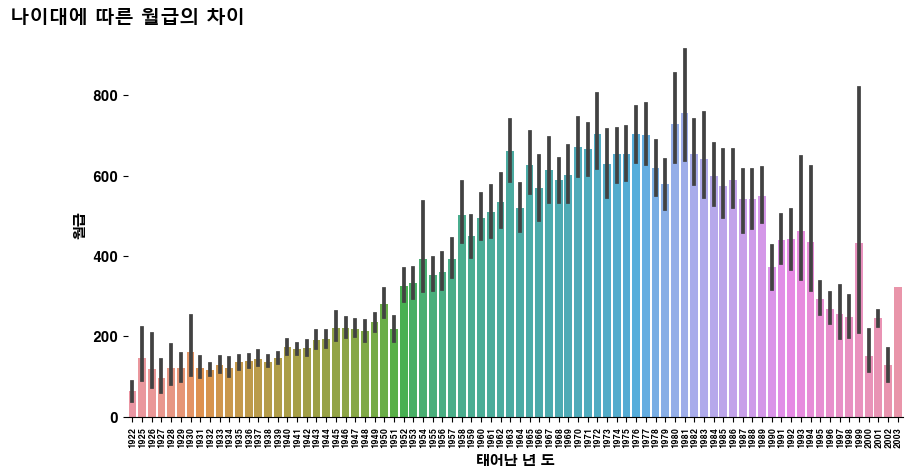

In [397]:
plt.figure(figsize=(10, 5))
sns.barplot(x='태어난 년 도', y='월급', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('나이대에 따른 월급의 차이', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=6)
plt.show()

## 3. 연령대별 성별에 따른 월급 차이

<Figure size 1000x500 with 0 Axes>

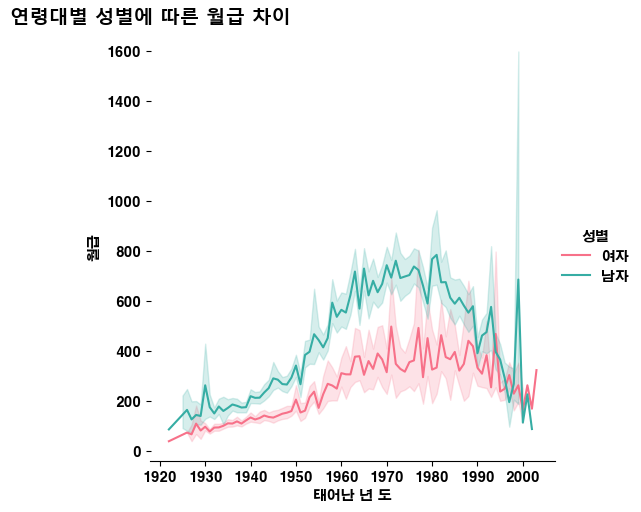

In [398]:
plt.figure(figsize=(10, 5))
sns.relplot(x='태어난 년 도', y='월급', data=korea, hue='성별', kind='line', palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('연령대별 성별에 따른 월급 차이', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


## 4. 교육 수준에 따른 월급의 차이

In [399]:
# 교육수준 값을 한글화 
education = {
    1.0 : '미취학(만 7세 미만)',
    2.0 : '무학(만 7세 이상)',
    3.0 : '초등학교',
    4.0 : '중학교',
    5.0 : '고등학교',
    6.0 : '전문대학',
    7.0 : '대학교',
    8.0 : '대학원(석사)',
    9.0 : '대학원(박사)',
}

korea['학력'] =  korea['학력'].replace(education)
korea

,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,지역,경제활동 참여상태,총생활비,월급
0,여자,1945,중학교,5.0,885.0,NaN,1.0,2.0,4.0,1.0,NaN,275.0,73.750000
1,남자,1948,초등학교,5.0,2884.0,942.0,2.0,2.0,5.0,1.0,NaN,239.0,240.333333
2,남자,1942,대학교,3.0,2544.0,762.0,1.0,3.0,2.0,1.0,3.0,156.0,212.000000
3,남자,1962,전문대학,5.0,5783.0,855.0,1.0,1.0,2.0,1.0,NaN,541.0,481.916667
4,여자,1940,초등학교,3.0,1192.0,941.0,1.0,2.0,4.0,2.0,9.0,85.0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,남자,1981,전문대학,5.0,5503.0,942.0,1.0,1.0,1.0,5.0,NaN,384.0,458.583333
7861,남자,1977,대학교,5.0,10790.0,311.0,1.0,1.0,2.0,5.0,NaN,715.0,899.166667
7862,남자,1976,대학교,5.0,10504.0,151.0,2.0,1.0,2.0,5.0,NaN,595.0,875.333333
7863,남자,1975,대학교,5.0,10420.0,222.0,2.0,1.0,2.0,2.0,NaN,562.0,868.333333


In [400]:
korea['학력'].unique()
# korea['학력']

array(['중학교', '초등학교', '대학교', '전문대학', '고등학교', '대학원(석사)', '무학(만 7세 이상)',
       '대학원(박사)'], dtype=object)

In [401]:
korea.dtypes

성별            object
태어난 년 도        int64
학력            object
학력 상태        float64
가처분소득        float64
직종           float64
종교           float64
혼인상태         float64
건강상태         float64
지역           float64
경제활동 참여상태    float64
총생활비         float64
월급           float64
dtype: object

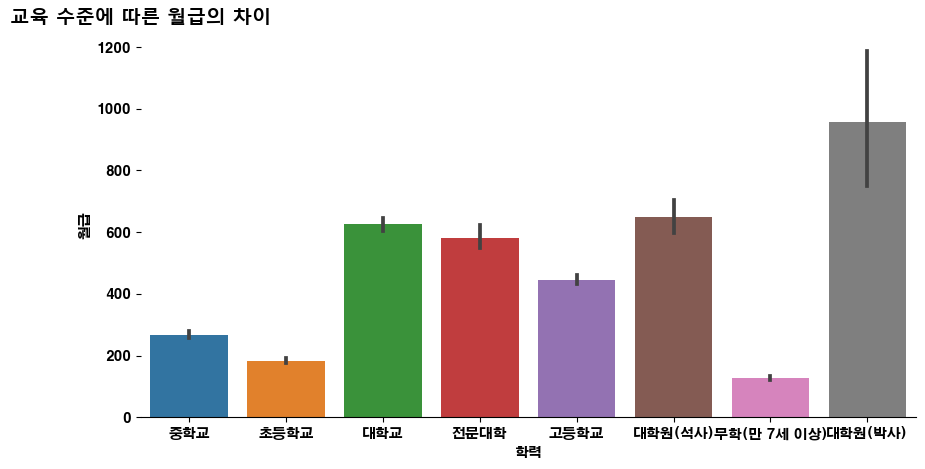

In [402]:
plt.figure(figsize=(10, 5))
sns.barplot(x='학력', y='월급', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('교육 수준에 따른 월급의 차이', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


## 5. 직업별 월급의 차이

In [403]:
korea['직종'].unique()

array([  nan,  942.,  762.,  855.,  941.,  151.,  399.,  521.,  783.,
        951.,  531.,  873.,  421.,  313.,  842.,  852.,  312.,  273.,
        799.,  930.,  761.,  235.,  721.,  149.,  710.,  863.,  910.,
        510.,  792.,  223.,  875.,  862.,  246.,  311.,  222.,  259.,
        741.,  751.,  251.,  753.,  231.,  274.,  330.,  442.,  611.,
        153.,  532.,  411.,  730.,  722.,  441.,  281.,  252.,  922.,
        133.,  891.,  823.,  159.,  248.,  431.,  285.,  221.,  141.,
        139.,  391.,  999.,  254.,  921.,  811.,  132.,  782.,  772.,
        284.,  121.,  135.,  232.,  320.,  225.,  112.,  952.,  239.,
        522.,  771.,  853.,  752.,  953.,  784.,  261.,  247.,  236.,
        122.,  245.,  314.,  422.,  874.,  892.,  992.,  233.,  283.,
        881.,  854.,  412.,  286.,  851.,  213.,  429.,  831.,  899.,
        432.,  781.,  243.,  282.,  392.,  841.,  131.,  612.,  864.,
        743.,  791.,  241.,  991.,  613.,  237.,  238.,  288.,  234.,
        832.,  882.,

In [404]:
korea.dtypes

성별            object
태어난 년 도        int64
학력            object
학력 상태        float64
가처분소득        float64
직종           float64
종교           float64
혼인상태         float64
건강상태         float64
지역           float64
경제활동 참여상태    float64
총생활비         float64
월급           float64
dtype: object

In [405]:
# 직종 값을 한글화 
job = {
    111 : '의회 의원 고위 공무원 및 공공단체 임원',
    112 : '기업 고위 임원',
    121 : '행정 및 경영 지원 관리자',
    122 : '마케팅 및 광고 홍보 관리자',
    131 : '연구 교육 및 법률 관련 관리자',
    132 : '보험 및 금융 관리자',
    133 : '보건 및 사회복지 관련 관리자',
    134 : '문화 예술 관련 관리자',
    135 : '정보 통신 관련 관리자',
    139 : '기타 전문 서비스 관리자',
    141 : '건설 전기 및 생산 관련 관리자',
    149 : '기타 건설 전기 및 생산 관련 관리자',
    151 : '판매 및 운송 관리자',
    152 : '고객 서비스 관리자',
    153 : '환경 청소 및 경비 관련 관리자',
    159 : '기타 판매 및 고객 서비스 관리자',
    211 : '생명 및 자연과학 관련 전문가',
    212 : '인문 및 사회과학 전문가',
    213 : '생명 및 자연과학 관련 시험원',
    221 : '컴퓨터 하드웨어 및 통신공학 전문가',
    222 : '컴퓨터 시스템 및 소프트웨어 전문가',
    223 : '데이터 및 네트워크 관련 전문가',
    224 : '정보 시스템 및 웹 운영자',
    225 : '통신 및 방송 송출 장비 기사',
    231 : '건축 토목 공학 기술자 및 시험원',
    232 : '화학공학 기술자 및 시험원',
    233 : '금속 재료 공학 기술자 및 시험원',
    234 : '전기 전자공학 기술자 및 시험원',
    235 : '기계 로봇공학 기술자 및 시험원',
    236 : '소방 방재 기술자 및 안전 관리원',
    237 : '환경공학 가스 에너지 기술자 및 시험원',
    238 : '항공기 선박 기관사 및 관제사',
    239 : '기타 공학 전문가 및 관련 종사자',
    241 : '의료 진료 전문가',
    242 : '약사 및 한약사',
    243 : '간호사',
    244 : '영양사',
    245 : '치료 재활사 및 의료기사',
    246 : '보건 의료 관련 종사자',
    247 : '사회복지 관련 종사자',
    248 : '종교 관련 종사자',
    251 : '대학교수 및 강사',
    252 : '학교 교사',
    253 : '유치원 교사',
    254 : '문리 기술 및 예능 강사',
    259 : '기타 교육 전문가',
    261 : '법률 전문가',
    262 : '행정 전문가',
    271 : '인사 및 경영 전문가',
    272 : '금융 및 보험 전문가',
    273 : '상품 기획 홍보 및 조사 전문가',
    274 : '감정 기술영업및중개관련종사자',
    281 : '작가 및 언론 관련 전문가',
    282 : '학예사 사서 및 기록물 관리사',
    283 : '연극 영화 및 영상 전문가',
    284 : '시각 및 공연 예술가',
    285 : '디자이너',
    286 : '스포츠 및 레크리에이션 관련 전문가',
    287 : '식문화 관련 전문가',
    288 : '문화 예술 관련 기획자 및 매니저',
    311 : '행정 사무원',
    312 : '경영 관련 사무원',
    313 : '회계 및 경리 사무원',
    314 : '비서 및 사무 보조원',
    320 : '금융 사무 종사자',
    330 : '법률 및 감사 사무 종사자',
    391 : '통계 관련 사무원',
    392 : '여행 안내 및 접수 사무원',
    399 : '고객 상담 및 기타 사무원',
    411 : '경찰 소방 및 교도 관련 종사자',
    412 : '경호 및 보안 관련 종사자',
    421 : '돌봄 및 보건 서비스 종사자',
    422 : '미용 관련 서비스 종사자',
    423 : '혼례 및 장례 종사자',
    429 : '기타 돌봄 보건 및 개인 생활 서비스 종사자',
    431 : '운송 서비스 종사자',
    432 : '여가 서비스 종사자',
    441 : '조리사',
    442 : '식음료 서비스 종사자',
    510 : '영업 종사자',
    521 : '매장 판매 종사자',
    522 : '상품 대여 종사자',
    531 : '통신 관련 판매직',
    532 : '방문 및 노점 판매 관련직',
    611 : '작물 재배 종사자',
    612 : '원예 및 조경 종사자',
    613 : '축산 및 사육 관련 종사자',
    620 : '임업 관련 종사자',
    630 : '어업 관련 종사자',
    710 : '식품가공 관련 기능 종사자',
    721 : '섬유 및 가죽 관련 기능 종사자',
    722 : '의복제조관련기능종사자',
    730 : '목재 가구 악기 및 간판 관련 기능 종사자',
    741 : '금형 주조 및 단조원',
    742 : '제관원 및 판금원',
    743 : '용접원',
    751 : '자동차 정비원',
    752 : '운송장비정비원',
    753 : '기계장비 설치 및 정비원',
    761 : '전기 전자기기 설치 및 수리원',
    762 : '전기공',
    771 : '정보 통신기기 설치 및 수리원',
    772 : '방송 통신장비 관련 설치 및 수리원',
    781 : '건설구조관련기능종사자',
    782 : '건설관련기능종사자',
    783 : '건축 마감 관련 기능 종사자',
    784 : '채굴 및 토목 관련 기능 종사자',
    791 : '공예 및 귀금속 세공원',
    792 : '배관공',
    799 : '기타 기능 관련 종사자',
    811 : '식품가공 관련 기계 조작원',
    812 : '음료제조관련기계조작원',
    819 : '기타 식품가공 관련 기계 조작원',
    821 : '섬유 제조 및 가공기계 조작원',
    822 : '직물 신발 관련 기계 조작원 및 조립원',
    823 : '세탁 관련 기계 조작원',
    831 : '석유 및 화학물 가공 장치 조작원',
    832 : '화학 고무 및 플라스틱 제품 생산기 조작원',
    841 : '주조 및 금속가공 관련 기계 조작원',
    842 : '도장 및 도금기 조작원',
    843 : '비금속제품 생산기 조작원',
    851 : '금속 공작 기계 조작원',
    852 : '냉난방 관련 설비 조작원',
    853 : '자동 조립라인 및 산업용로봇 조작원',
    854 : '운송차량 및 기계 관련 조립원',
    855 : '금속기계 부품 조립원',
    861 : '발전 및 배전장치 조작원',
    862 : '전기 및 전자설비 조작원',
    863 : '전기 전자 부품 및 제품 제조 장치 조작원',
    864 : '전기 전자 부품 및 제품 조립원',
    871 : '철도 및 전동차 기관사',
    872 : '철도운송 관련 종사자',
    873 : '자동차 운전원',
    874 : '물품 이동 장비 조작원',
    875 : '건설 및 채굴기계 운전원',
    876 : '선박 승무원 및 관련 종사자',
    881 : '상하수도 처리 장치 조작원',
    882 : '재활용 처리 및 소각로 조작원',
    891 : '목재 및 종이 관련 기계 조작원',
    892 : '인쇄 및 사진 현상 관련 기계 조작원',
    899 : '기타 기계 조작원',
    910 : '건설 및 광업 단순 종사자',
    921 : '하역 및 적재 단순 종사자',
    922 : '배달원',
    930 : '제조 관련 단순 종사자',
    941 : '청소원 및 환경미화원',
    942 : '건물 관리원 및 검표원',
    951 : '가사 및 육아 도우미',
    952 : '음식 관련 단순 종사자',
    953 : '판매 관련 단순 종사자',
    991 : '농림∙어업 관련 단순 종사자',
    992 : '계기∙자판기 및 주차 관리 종사자',
    999 : '기타 서비스 관련 단순 종사자',
    1001 : '장교',
    1002 : '부사관',
    1009 : '기타 군인'
}

korea['직종'] =  korea['직종'].replace(job)
korea

,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,지역,경제활동 참여상태,총생활비,월급
0,여자,1945,중학교,5.0,885.0,NaN,1.0,2.0,4.0,1.0,NaN,275.0,73.750000
1,남자,1948,초등학교,5.0,2884.0,건물 관리원 및 검표원,2.0,2.0,5.0,1.0,NaN,239.0,240.333333
2,남자,1942,대학교,3.0,2544.0,전기공,1.0,3.0,2.0,1.0,3.0,156.0,212.000000
3,남자,1962,전문대학,5.0,5783.0,금속기계 부품 조립원,1.0,1.0,2.0,1.0,NaN,541.0,481.916667
4,여자,1940,초등학교,3.0,1192.0,청소원 및 환경미화원,1.0,2.0,4.0,2.0,9.0,85.0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,남자,1981,전문대학,5.0,5503.0,건물 관리원 및 검표원,1.0,1.0,1.0,5.0,NaN,384.0,458.583333
7861,남자,1977,대학교,5.0,10790.0,행정 사무원,1.0,1.0,2.0,5.0,NaN,715.0,899.166667
7862,남자,1976,대학교,5.0,10504.0,판매 및 운송 관리자,2.0,1.0,2.0,5.0,NaN,595.0,875.333333
7863,남자,1975,대학교,5.0,10420.0,컴퓨터 시스템 및 소프트웨어 전문가,2.0,1.0,2.0,2.0,NaN,562.0,868.333333


C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


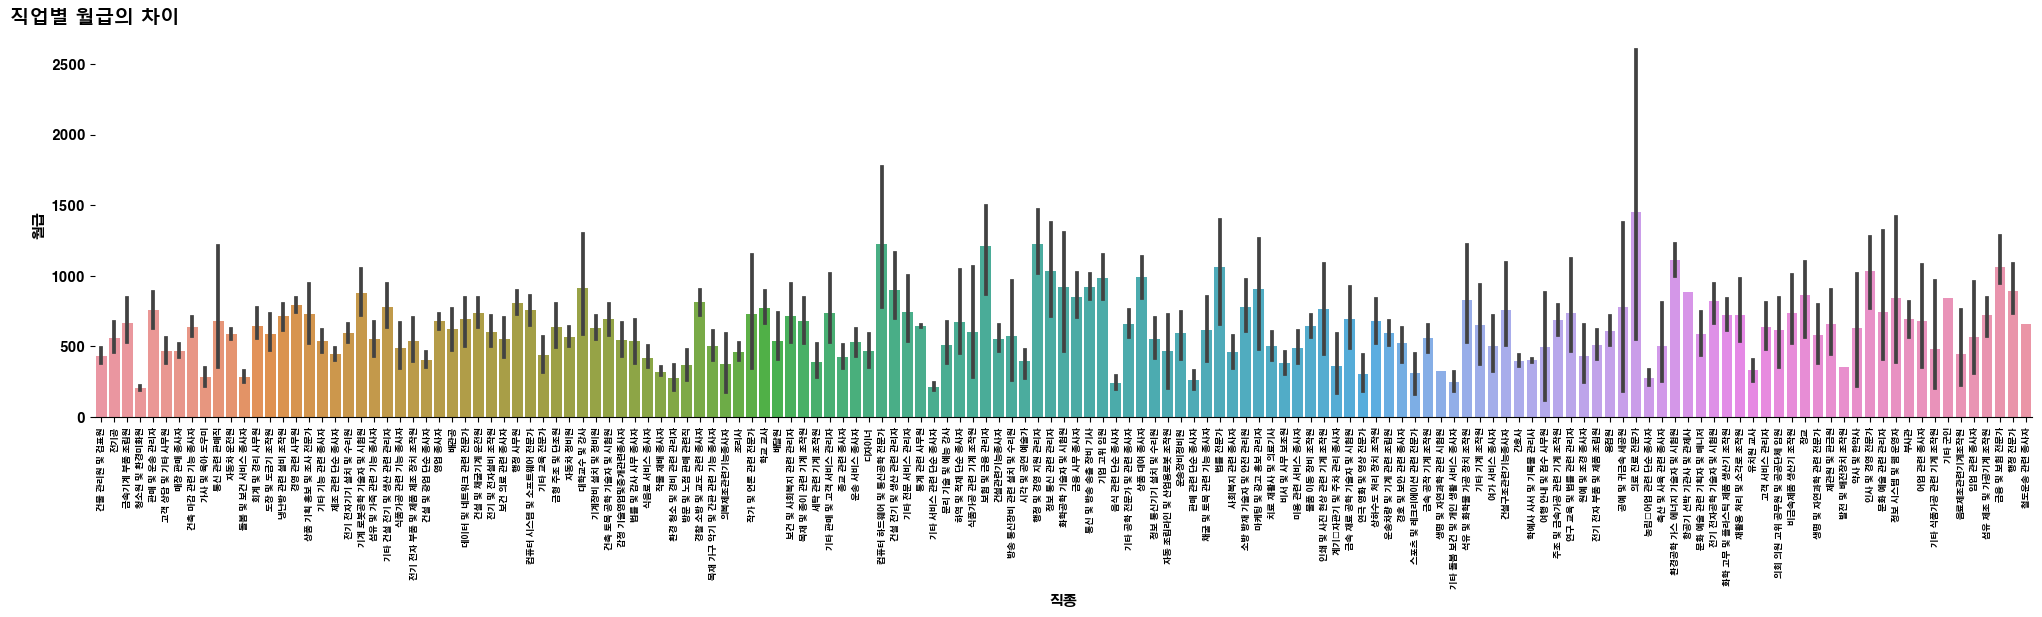

In [406]:
plt.figure(figsize=(25, 5))
sns.barplot(x='직종', y='월급', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('직업별 월급의 차이', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=6)
plt.show()


## 6. 성별 직업 분포

C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


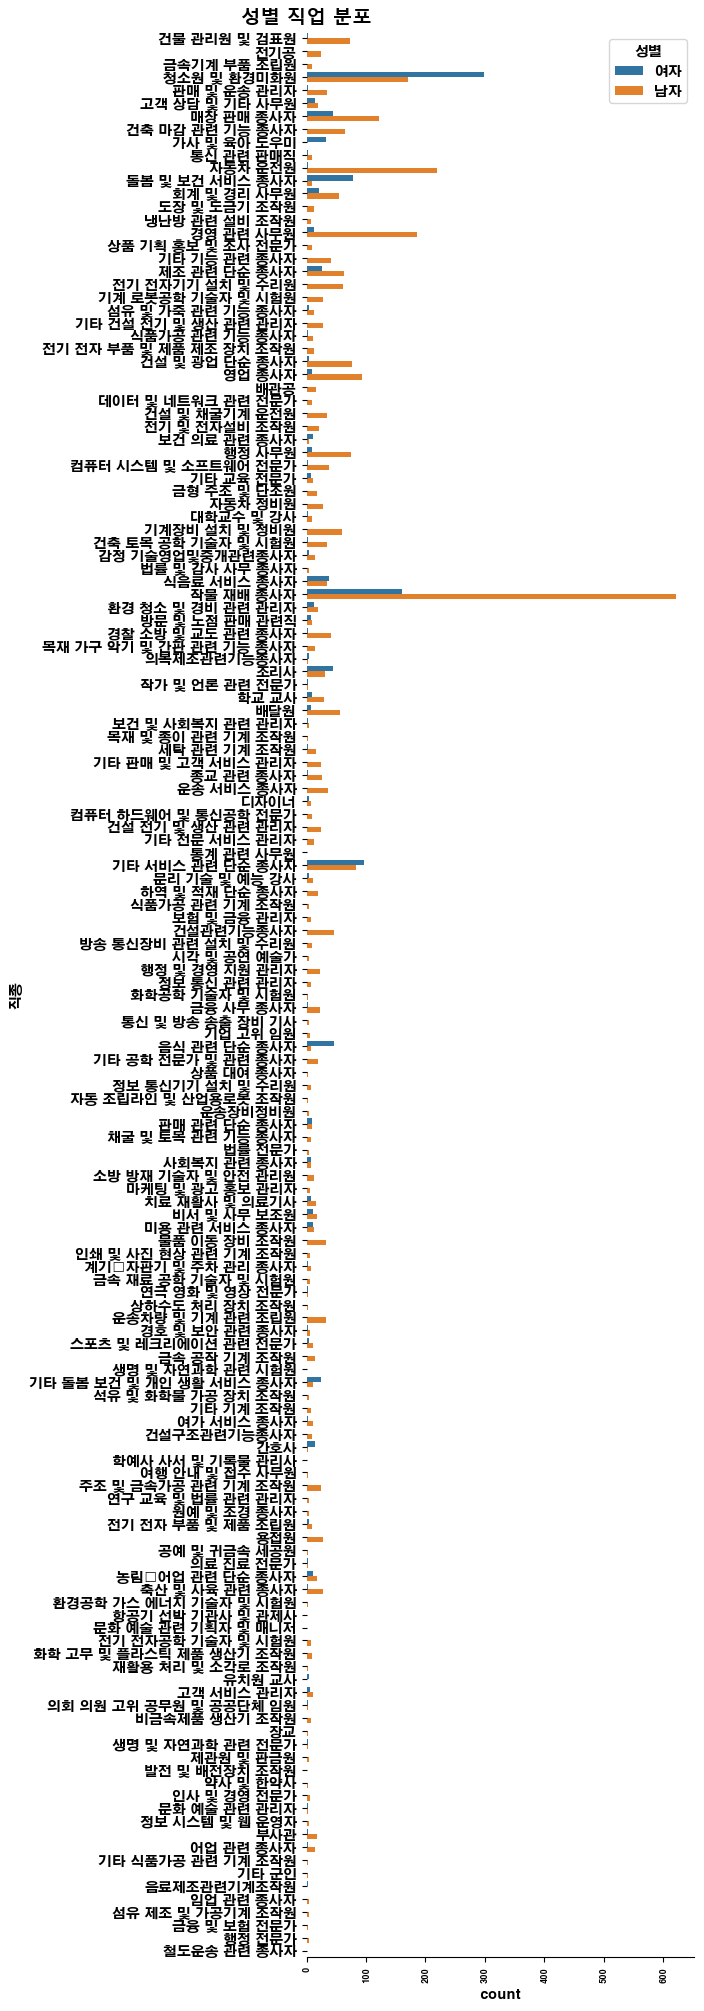

In [407]:
plt.figure(figsize=(5, 25))
sns.countplot(y='직종', hue='성별', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('성별 직업 분포', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=6)
plt.show()


## 7. 종교유무에 따른 이혼율

In [408]:
# 종교 값을 한글화 
religion = {
    1.0 : '종교가 있다',
    2.0 : '종교가 없다'
}

korea['종교'] =  korea['종교'].replace(religion)
korea

,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,지역,경제활동 참여상태,총생활비,월급
0,여자,1945,중학교,5.0,885.0,NaN,종교가 있다,2.0,4.0,1.0,NaN,275.0,73.750000
1,남자,1948,초등학교,5.0,2884.0,건물 관리원 및 검표원,종교가 없다,2.0,5.0,1.0,NaN,239.0,240.333333
2,남자,1942,대학교,3.0,2544.0,전기공,종교가 있다,3.0,2.0,1.0,3.0,156.0,212.000000
3,남자,1962,전문대학,5.0,5783.0,금속기계 부품 조립원,종교가 있다,1.0,2.0,1.0,NaN,541.0,481.916667
4,여자,1940,초등학교,3.0,1192.0,청소원 및 환경미화원,종교가 있다,2.0,4.0,2.0,9.0,85.0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,남자,1981,전문대학,5.0,5503.0,건물 관리원 및 검표원,종교가 있다,1.0,1.0,5.0,NaN,384.0,458.583333
7861,남자,1977,대학교,5.0,10790.0,행정 사무원,종교가 있다,1.0,2.0,5.0,NaN,715.0,899.166667
7862,남자,1976,대학교,5.0,10504.0,판매 및 운송 관리자,종교가 없다,1.0,2.0,5.0,NaN,595.0,875.333333
7863,남자,1975,대학교,5.0,10420.0,컴퓨터 시스템 및 소프트웨어 전문가,종교가 없다,1.0,2.0,2.0,NaN,562.0,868.333333


In [409]:
# 혼인 상태 값을 한글화 
conjugality = {
    0 : '비해당(18세 미만)',
    1.0 : '유배우',
    2.0 : '사별',
    3.0 : '이혼',
    4.0 : '별거',
    5.0 : '미혼(18세이상, 미혼모 포함)',
    6.0 : '기타(사망 등)'
}

korea['혼인상태'] =  korea['혼인상태'].replace(conjugality)
korea

,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,지역,경제활동 참여상태,총생활비,월급
0,여자,1945,중학교,5.0,885.0,NaN,종교가 있다,사별,4.0,1.0,NaN,275.0,73.750000
1,남자,1948,초등학교,5.0,2884.0,건물 관리원 및 검표원,종교가 없다,사별,5.0,1.0,NaN,239.0,240.333333
2,남자,1942,대학교,3.0,2544.0,전기공,종교가 있다,이혼,2.0,1.0,3.0,156.0,212.000000
3,남자,1962,전문대학,5.0,5783.0,금속기계 부품 조립원,종교가 있다,유배우,2.0,1.0,NaN,541.0,481.916667
4,여자,1940,초등학교,3.0,1192.0,청소원 및 환경미화원,종교가 있다,사별,4.0,2.0,9.0,85.0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,남자,1981,전문대학,5.0,5503.0,건물 관리원 및 검표원,종교가 있다,유배우,1.0,5.0,NaN,384.0,458.583333
7861,남자,1977,대학교,5.0,10790.0,행정 사무원,종교가 있다,유배우,2.0,5.0,NaN,715.0,899.166667
7862,남자,1976,대학교,5.0,10504.0,판매 및 운송 관리자,종교가 없다,유배우,2.0,5.0,NaN,595.0,875.333333
7863,남자,1975,대학교,5.0,10420.0,컴퓨터 시스템 및 소프트웨어 전문가,종교가 없다,유배우,2.0,2.0,NaN,562.0,868.333333


In [410]:
korea.dtypes

성별            object
태어난 년 도        int64
학력            object
학력 상태        float64
가처분소득        float64
직종            object
종교            object
혼인상태          object
건강상태         float64
지역           float64
경제활동 참여상태    float64
총생활비         float64
월급           float64
dtype: object

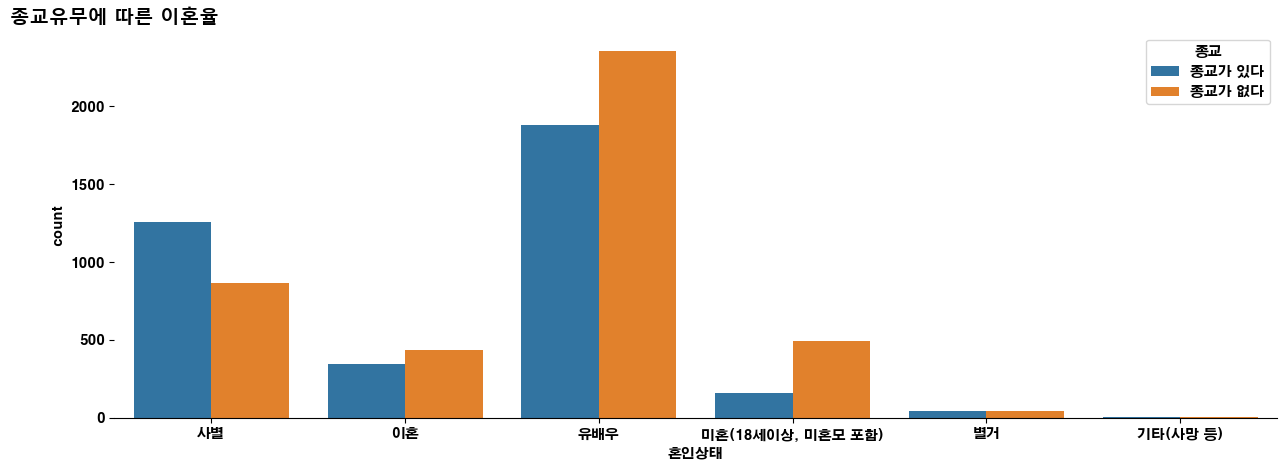

In [411]:
plt.figure(figsize=(15, 5))
sns.countplot(x='혼인상태', hue='종교', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('종교유무에 따른 이혼율', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


## 8. 노년층이 많은 지역은

In [412]:
# 지역 값을 한글화 
region = {
    1.0 : '서울',
    2.0 : '수도권(인천/경기)',
    3.0 : '부산/경남/울산',
    4.0 : '대구/경북',
    5.0 : '대전/충남/세종',
    6.0 : '강원/충북',
    7.0 : '광주/전남/전북/제주도'
}

korea['지역'] =  korea['지역'].replace(region)
korea

,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,지역,경제활동 참여상태,총생활비,월급
0,여자,1945,중학교,5.0,885.0,NaN,종교가 있다,사별,4.0,서울,NaN,275.0,73.750000
1,남자,1948,초등학교,5.0,2884.0,건물 관리원 및 검표원,종교가 없다,사별,5.0,서울,NaN,239.0,240.333333
2,남자,1942,대학교,3.0,2544.0,전기공,종교가 있다,이혼,2.0,서울,3.0,156.0,212.000000
3,남자,1962,전문대학,5.0,5783.0,금속기계 부품 조립원,종교가 있다,유배우,2.0,서울,NaN,541.0,481.916667
4,여자,1940,초등학교,3.0,1192.0,청소원 및 환경미화원,종교가 있다,사별,4.0,수도권(인천/경기),9.0,85.0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,남자,1981,전문대학,5.0,5503.0,건물 관리원 및 검표원,종교가 있다,유배우,1.0,대전/충남/세종,NaN,384.0,458.583333
7861,남자,1977,대학교,5.0,10790.0,행정 사무원,종교가 있다,유배우,2.0,대전/충남/세종,NaN,715.0,899.166667
7862,남자,1976,대학교,5.0,10504.0,판매 및 운송 관리자,종교가 없다,유배우,2.0,대전/충남/세종,NaN,595.0,875.333333
7863,남자,1975,대학교,5.0,10420.0,컴퓨터 시스템 및 소프트웨어 전문가,종교가 없다,유배우,2.0,수도권(인천/경기),NaN,562.0,868.333333


In [413]:
korea['지역'].unique()

array(['서울', '수도권(인천/경기)', '광주/전남/전북/제주도', '대전/충남/세종', '강원/충북', '대구/경북',
       '부산/경남/울산'], dtype=object)

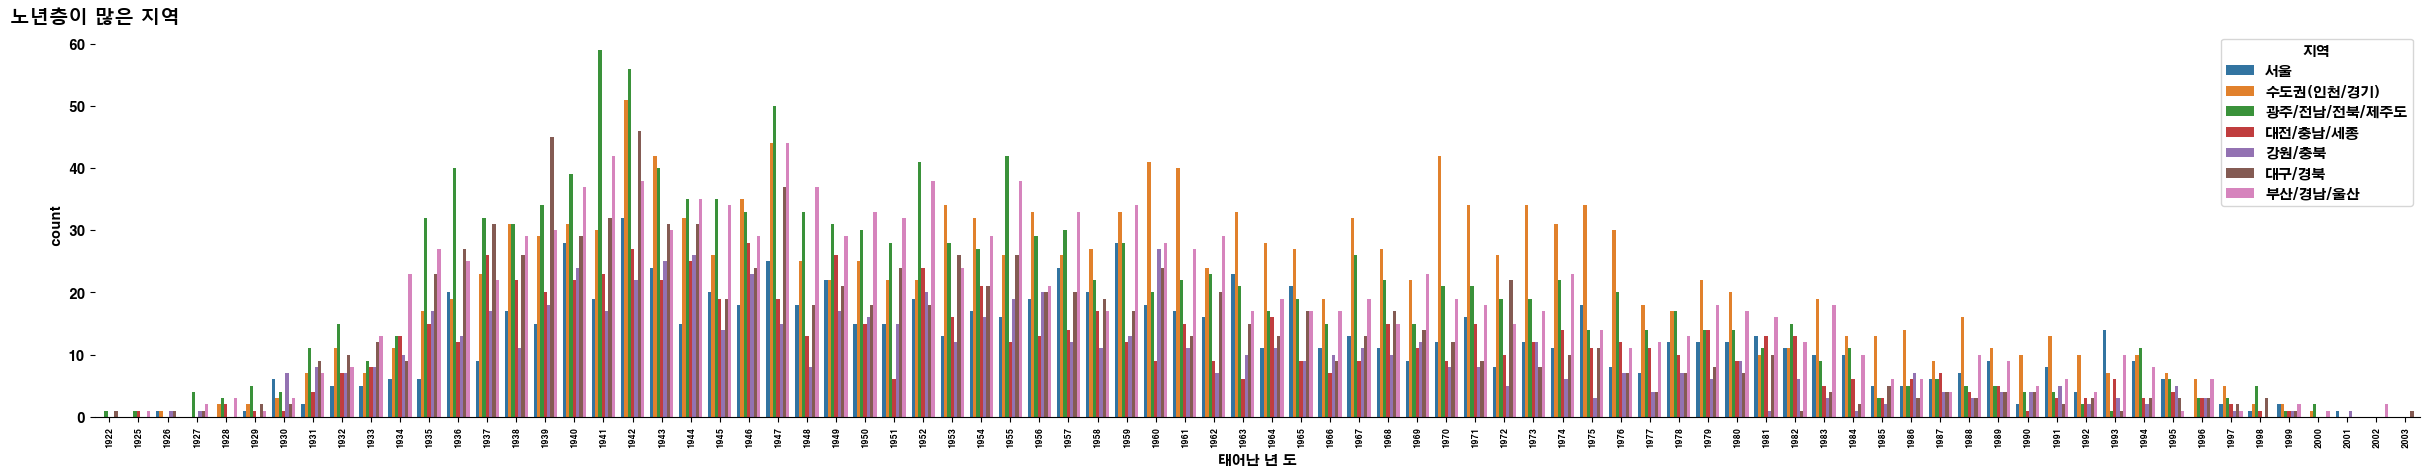

In [414]:
plt.figure(figsize=(30, 5))
sns.countplot(x='태어난 년 도', hue='지역', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('노년층이 많은 지역', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=6)
plt.show()


## 9. 교육수준과 건강과 관계가 있는가?

In [415]:
# 건강 상태 값을 한글화 
health = {
    1.0 : '아주 건강하다',
    2.0 : '건강한 편이다',
    3.0 : '보통이다',
    4.0 : '건강하지 않은 편이다 ',
    5.0 : '건강이 아주 안 좋다',
}

korea['건강상태'] =  korea['건강상태'].replace(health)
korea

,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,지역,경제활동 참여상태,총생활비,월급
0,여자,1945,중학교,5.0,885.0,NaN,종교가 있다,사별,건강하지 않은 편이다,서울,NaN,275.0,73.750000
1,남자,1948,초등학교,5.0,2884.0,건물 관리원 및 검표원,종교가 없다,사별,건강이 아주 안 좋다,서울,NaN,239.0,240.333333
2,남자,1942,대학교,3.0,2544.0,전기공,종교가 있다,이혼,건강한 편이다,서울,3.0,156.0,212.000000
3,남자,1962,전문대학,5.0,5783.0,금속기계 부품 조립원,종교가 있다,유배우,건강한 편이다,서울,NaN,541.0,481.916667
4,여자,1940,초등학교,3.0,1192.0,청소원 및 환경미화원,종교가 있다,사별,건강하지 않은 편이다,수도권(인천/경기),9.0,85.0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,남자,1981,전문대학,5.0,5503.0,건물 관리원 및 검표원,종교가 있다,유배우,아주 건강하다,대전/충남/세종,NaN,384.0,458.583333
7861,남자,1977,대학교,5.0,10790.0,행정 사무원,종교가 있다,유배우,건강한 편이다,대전/충남/세종,NaN,715.0,899.166667
7862,남자,1976,대학교,5.0,10504.0,판매 및 운송 관리자,종교가 없다,유배우,건강한 편이다,대전/충남/세종,NaN,595.0,875.333333
7863,남자,1975,대학교,5.0,10420.0,컴퓨터 시스템 및 소프트웨어 전문가,종교가 없다,유배우,건강한 편이다,수도권(인천/경기),NaN,562.0,868.333333


In [416]:
korea['건강상태'].unique()

array(['건강하지 않은 편이다 ', '건강이 아주 안 좋다', '건강한 편이다', '보통이다', '아주 건강하다'],
      dtype=object)

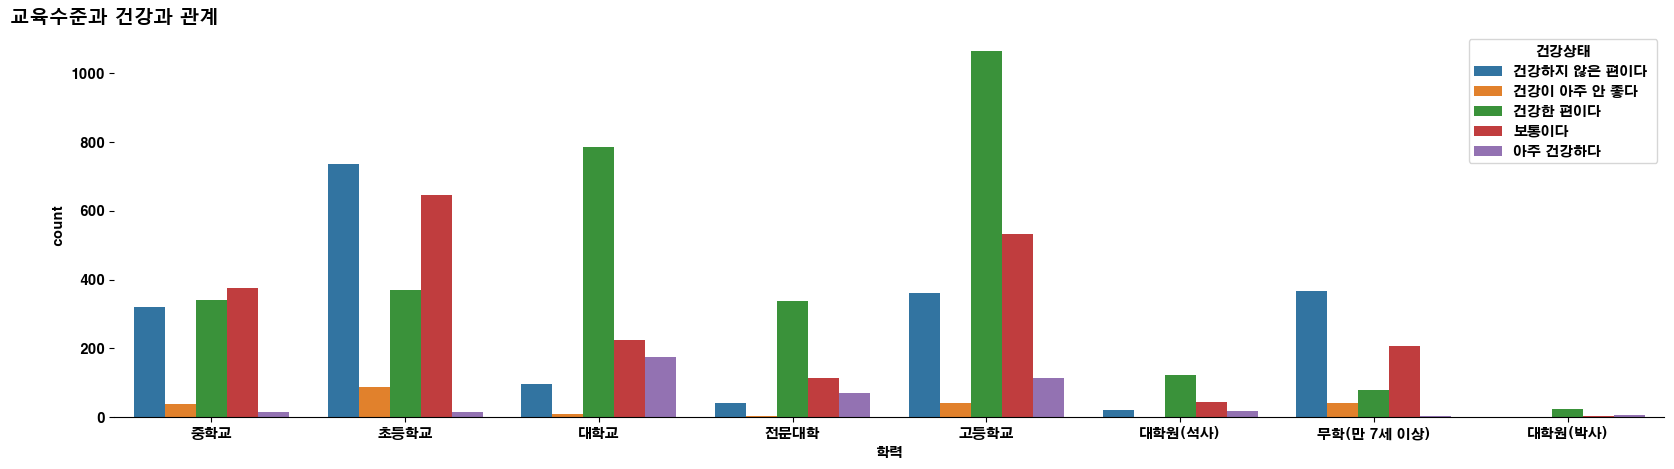

In [417]:
plt.figure(figsize=(20, 5))
sns.countplot(x='학력', hue='건강상태', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('교육수준과 건강과 관계', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


## 10. 월급과 건강과 관계가 있는가?

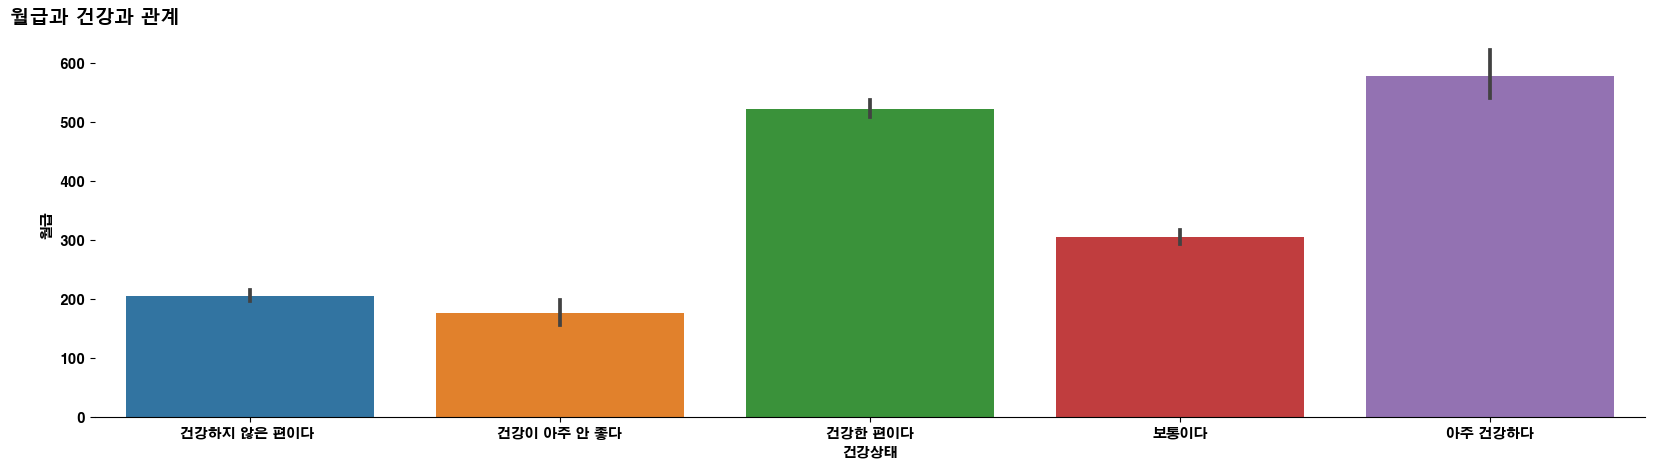

In [418]:
plt.figure(figsize=(20, 5))
sns.barplot(x='건강상태', y='월급', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('월급과 건강과 관계', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


## 11. 종교와 건강과 관계가 있는가?

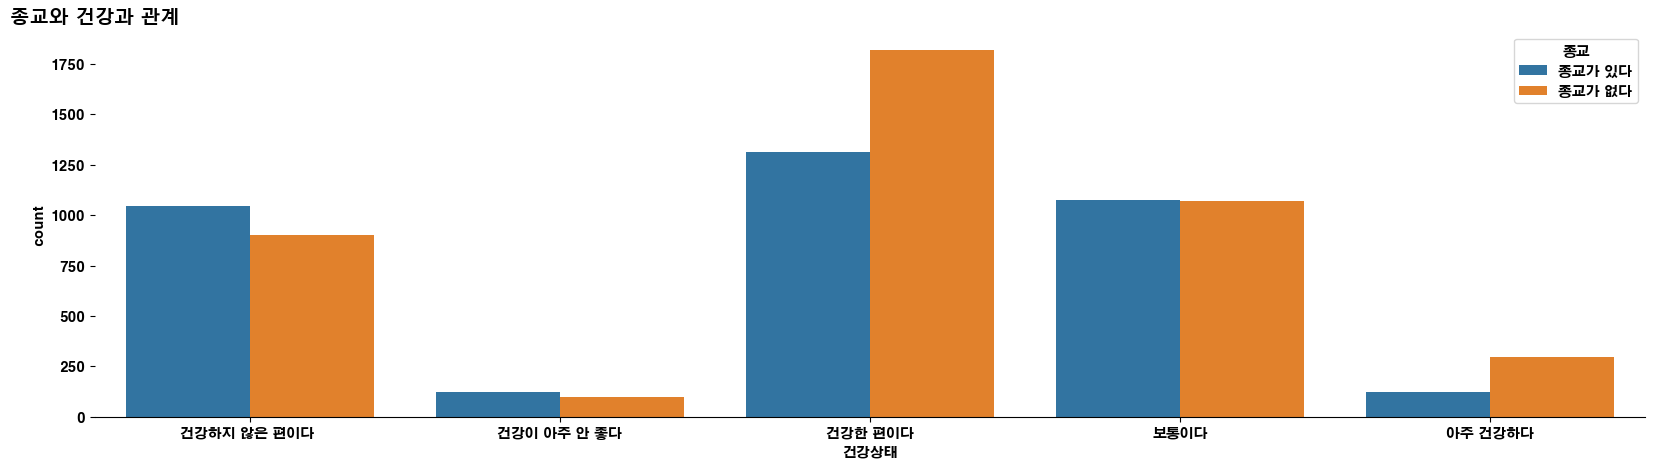

In [419]:
plt.figure(figsize=(20, 5))
sns.countplot(x='건강상태', hue='종교', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('종교와 건강과 관계', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


## 12. 주요 경제활동 참여상태의 비율은?

In [420]:
# 경제활동 참여상태 값을 한글화 
economy = {
    1.0 : '상용직 임금근로자',
    2.0 : '임시직 임금근로자',
    3.0 : '일용직 임금근로자',
    4.0 : '자활근로, 공공근로, 노인일자',
    5.0 : '고용주',
    6.0 : '자영업자',
    7.0 : '무급가족종사자',
    8.0 : '실업자(지난 4주간 적극적으로 구직활동을 함)',
    9.0 : '비경제 활동인구',
}

korea['경제활동 참여상태'] =  korea['경제활동 참여상태'].replace(economy)
korea

,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,지역,경제활동 참여상태,총생활비,월급
0,여자,1945,중학교,5.0,885.0,NaN,종교가 있다,사별,건강하지 않은 편이다,서울,NaN,275.0,73.750000
1,남자,1948,초등학교,5.0,2884.0,건물 관리원 및 검표원,종교가 없다,사별,건강이 아주 안 좋다,서울,NaN,239.0,240.333333
2,남자,1942,대학교,3.0,2544.0,전기공,종교가 있다,이혼,건강한 편이다,서울,일용직 임금근로자,156.0,212.000000
3,남자,1962,전문대학,5.0,5783.0,금속기계 부품 조립원,종교가 있다,유배우,건강한 편이다,서울,NaN,541.0,481.916667
4,여자,1940,초등학교,3.0,1192.0,청소원 및 환경미화원,종교가 있다,사별,건강하지 않은 편이다,수도권(인천/경기),비경제 활동인구,85.0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,남자,1981,전문대학,5.0,5503.0,건물 관리원 및 검표원,종교가 있다,유배우,아주 건강하다,대전/충남/세종,NaN,384.0,458.583333
7861,남자,1977,대학교,5.0,10790.0,행정 사무원,종교가 있다,유배우,건강한 편이다,대전/충남/세종,NaN,715.0,899.166667
7862,남자,1976,대학교,5.0,10504.0,판매 및 운송 관리자,종교가 없다,유배우,건강한 편이다,대전/충남/세종,NaN,595.0,875.333333
7863,남자,1975,대학교,5.0,10420.0,컴퓨터 시스템 및 소프트웨어 전문가,종교가 없다,유배우,건강한 편이다,수도권(인천/경기),NaN,562.0,868.333333


In [421]:
korea['경제활동 참여상태'].unique()

array([nan, '일용직 임금근로자', '비경제 활동인구', '자활근로, 공공근로, 노인일자',
       '실업자(지난 4주간 적극적으로 구직활동을 함)'], dtype=object)

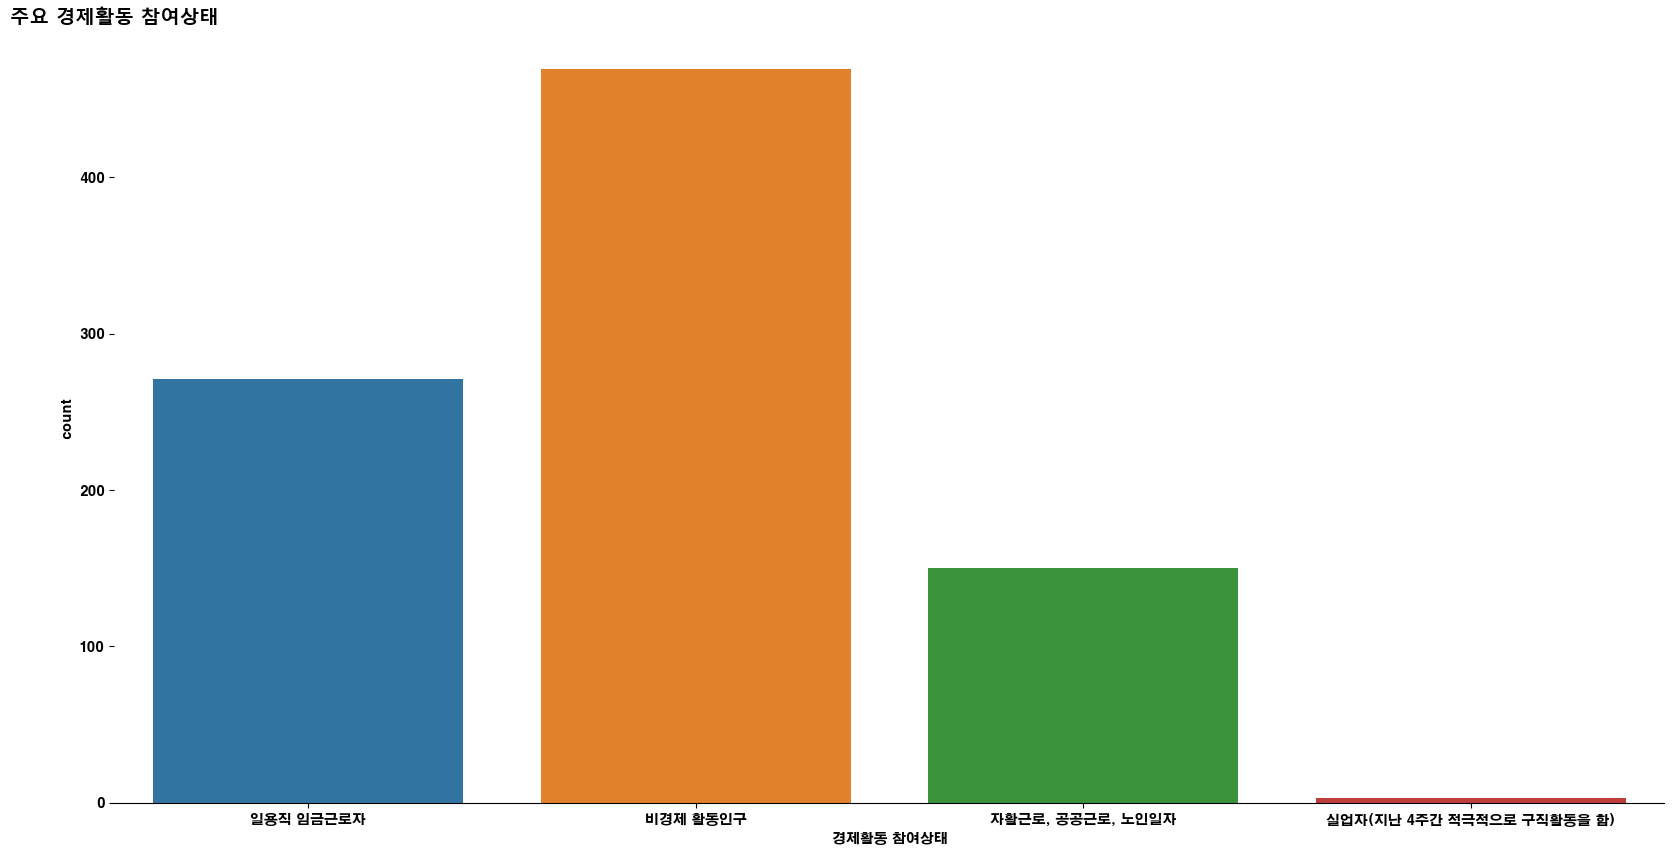

In [422]:
plt.figure(figsize=(20, 10))
sns.countplot(x='경제활동 참여상태', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('주요 경제활동 참여상태', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


## 13. 직업별 총생활비 지출의 평균은?

C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


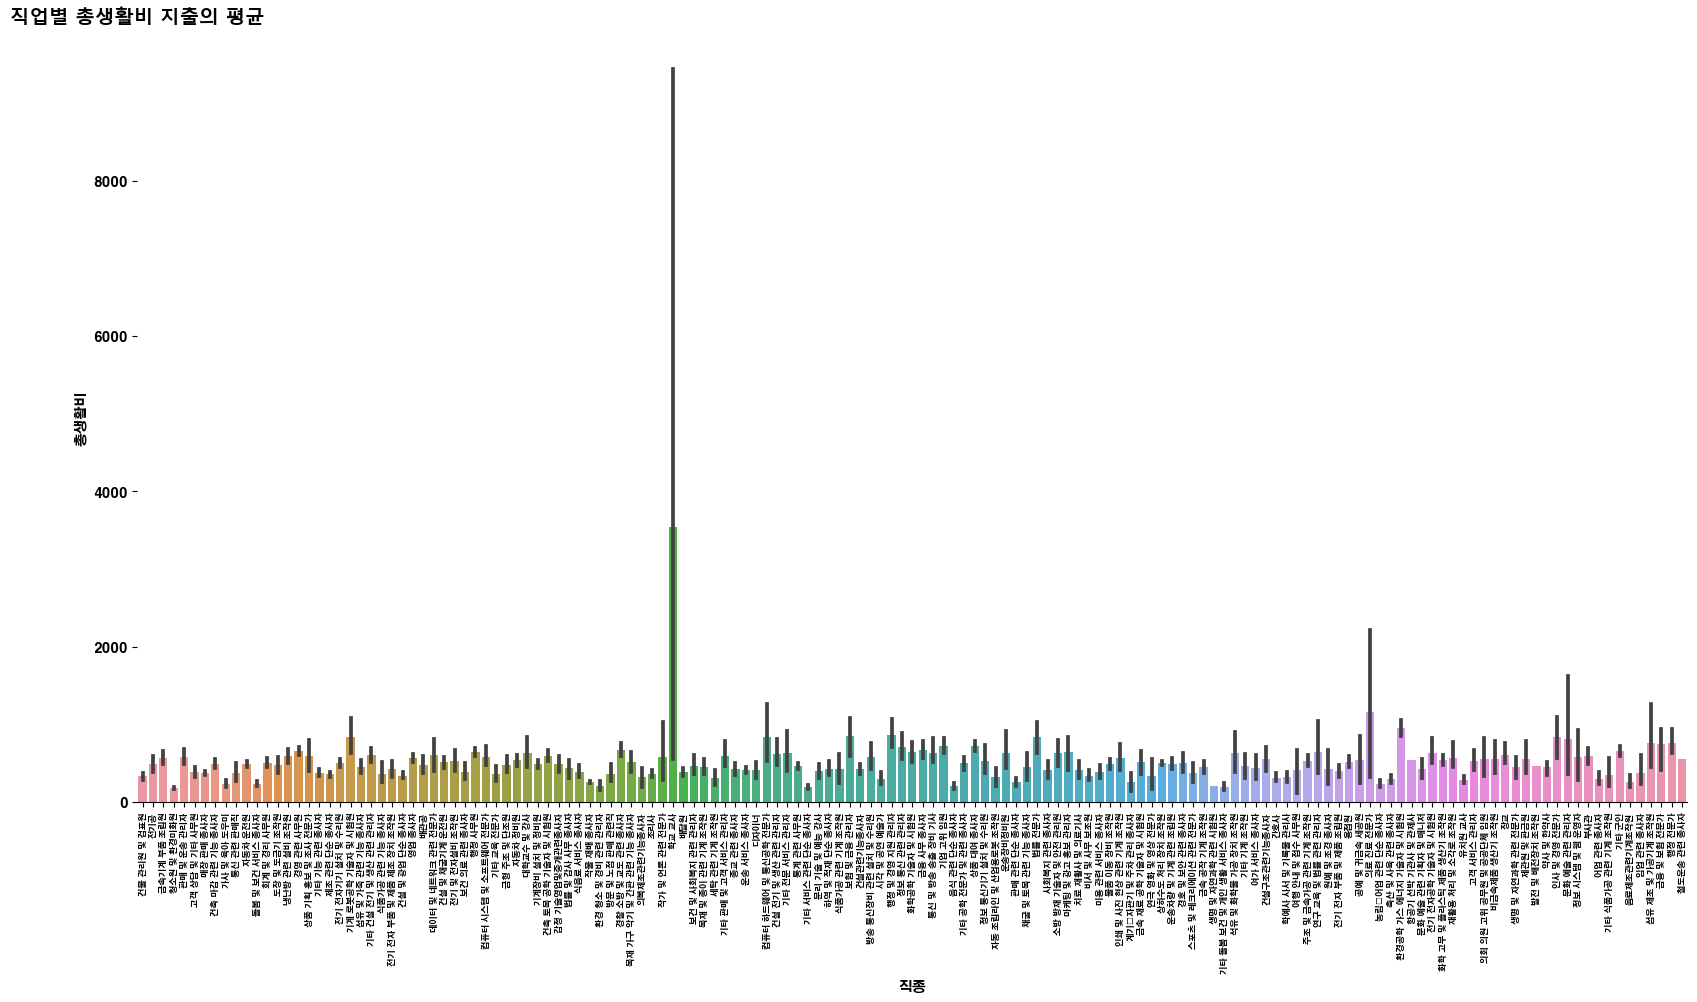

In [426]:
plt.figure(figsize=(20, 10))
sns.barplot(x='직종', y='총생활비', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('직업별 총생활비 지출의 평균', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=6)
plt.show()


In [428]:
# 학교교사의 평균 총생활비
korea_schoolteacher = korea[korea['직종'] == '학교 교사']
korea_schoolteacher['총생활비'].mean()

3539.6923076923076

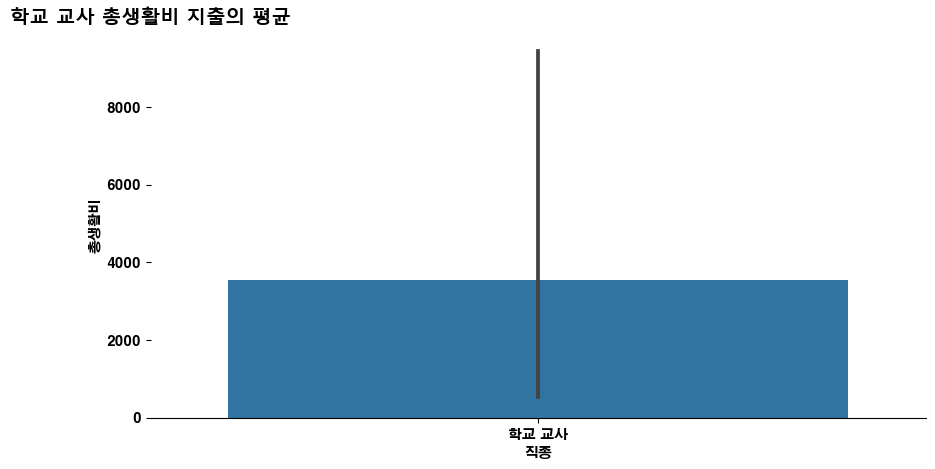

In [431]:
plt.figure(figsize=(10, 5))
sns.barplot(x='직종', y='총생활비', data=korea_schoolteacher)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('학교 교사 총생활비 지출의 평균', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()
